Nama : Miecel Alicia Angel J.   

NIM  : 2702327601

# **1A - Final Project Machine Learning**

## **Objectives:**  
Develop machine learning models to predict cirrhosis stages for early health screening. Key tasks include **performing EDA** to analyze dataset structure, **detect anomalies** (e.g., missing values or outliers), and address these issues for better model performance. Next, train **Random Forest and XGBoost** models, **fine-tuning at least three hyperparameters** with a defined search space, and **evaluate them using an independent test set**. **Analyze results using at least three evaluation metrics** (e.g., accuracy, precision, recall) to determine the best-performing model. Finally, **identify the most important features from the best model** to understand their impact on predictions.

## **Data Description - Cirrhosis:**  
a. **ID**: the individual’s patient ID.

b. **Registration Date**: the individual’s registration date at the hospital.

c. **Drug**: type of drug given to the individual (D-penicillamine or placebo).

d. **Birth Date**: the birth date of the individual.

e. **Gender**: the gender of the individual.

f. **Ascites**: presence of ascites (Y/N).

g. **Hepatomegaly**: presence of hepatomegaly (Y/N).

h. **Edema**: presence of edema (N = no edema, S = edema without diuretics, Y = edema despite diuretic therapy).

i. **Bilirubin**: serum bilirubin (mg/dL).

j. **Cholesterol**: serum cholesterol (mg/dL).
  
k. **Albumin**: amount of albumin (g/dL).

l. **Copper**: amount of copper found in urine (μg/day).

m. **Alkaline Phospatase (U/L)**: alkaline phosphatase (U/L).

n. **SGOT**: Serum Glutamic-Oxaloacetic Transaminase (U/mL).

o. **Tryglicerides**: Amount of triglycerides (mg/dL).

p. **Platelets**: Platelets per cubic (mL/1000).

q. **Prothrombin**: Prothrombin time (s).

r. **Stage**: Histologic stage of the cirrhosis

## **Import Libraries**

In [25]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## **Read Dataset**

In [27]:
df = pd.read_csv("1A.tsv", sep = '\t')
df.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


## **Exploratory Data Analysis & Data Preprocessing**

In [28]:
df.shape

(418, 18)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

In [30]:
df.describe()

,ID,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,80.000000,418.000000,310.000000,312.000000,312.000000,418.000000,407.000000,416.000000
mean,209.500000,3.220813,358.662500,3.497440,97.648387,1982.655769,122.556346,83.803828,257.024570,10.731731
std,120.810458,4.407506,230.414099,0.424972,85.613920,2140.388824,56.699525,79.603693,98.325585,1.022000
min,1.000000,0.300000,149.000000,1.960000,4.000000,289.000000,26.350000,-1.000000,62.000000,9.000000
25%,105.250000,0.800000,236.000000,3.242500,41.250000,871.500000,80.600000,-1.000000,188.500000,10.000000
50%,209.500000,1.400000,284.500000,3.530000,73.000000,1259.000000,114.700000,85.000000,251.000000,10.600000
75%,313.750000,3.400000,409.500000,3.770000,123.000000,1980.000000,151.900000,127.750000,318.000000,11.100000
max,418.000000,28.000000,1480.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


**Dropping Unnecessary Columns**

In [32]:
df = df.drop(columns = ['ID', 'Registration Date', 'Birth Date'])

Columns 'ID,' 'Registration Date,' and 'Birth Date' are dropped as they are irrelevant for predicting cirrhosis stages and could add noise to the model.

**Checking Duplicated Data and Missing Values**

In [33]:
df.duplicated().sum()

0

No duplicated values in the dataset, further preprocessing is uneccessary.

In [34]:
df.isnull().sum()

,0
Drug,106
Gender,0
Ascites,106
Hepatomegaly,106
Edema,0
Bilirubin,0
Cholesterol,338
Albumin,0
Copper,108
Alkaline Phospatase (U/L),106


Lots of missing values in the dataset, further data preprocessing is needed.

In [35]:
df = df.drop(columns = ['Cholesterol'], axis = 1)

The 'cholesterol' column is dropped because it has 338 missing values out of 418 rows, making it uninformative and unreliable for analysis.

In [36]:
df = df.dropna()

**Checking Unique Values in Each Columns**

In [37]:
for i in df.columns:
    print(f"{df[i].value_counts()} \n")

Drug
D-penicillamine    152
Placebo            149
d-penicillamine      3
placebo              1
lacebo               1
Name: count, dtype: int64 

Gender
F    271
M     35
Name: count, dtype: int64 

Ascites
N    283
Y     23
Name: count, dtype: int64 

Hepatomegaly
Y    156
N    150
Name: count, dtype: int64 

Edema
N    258
S     28
Y     20
Name: count, dtype: int64 

Bilirubin
0.6     21
0.5     20
0.7     19
1.1     17
0.8     16
        ..
6.7      1
6.5      1
16.2     1
7.3      1
1.7      1
Name: count, Length: 85, dtype: int64 

Albumin
3.35    9
3.70    7
3.85    6
3.60    6
3.50    6
       ..
3.30    1
4.13    1
2.89    1
3.84    1
3.16    1
Name: count, Length: 135, dtype: int64 

Copper
52.0     8
67.0     7
58.0     6
75.0     6
39.0     5
        ..
178.0    1
110.0    1
154.0    1
269.0    1
186.0    1
Name: count, Length: 157, dtype: int64 

Alkaline Phospatase (U/L)
674.0     2
663.0     2
7277.0    2
1345.0    2
815.0     2
         ..
804.0     1
2404.0    1
754.

There are several anomalies in the dataset, such as inconsistent labeling in the **'Drug'** column (e.g., "D-penicillamine" vs. "d-penicillamine" and "Placebo" vs. "placebo") and in the **'Stage'** column (e.g., "stage_3," "Stage4," "Stage 2," and "Stage 1"), which need to be standardized for accurate analysis.

**Splitting Numerical and Categorical Features**

In [38]:
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
Categorical Features: ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']


**Handling Anomalies**

In [39]:
df['Drug'] = df['Drug'].str.strip().str.capitalize()

df['Drug'] = df['Drug'].replace({
    'Lacebo': 'Placebo',
})

print(df['Drug'].value_counts())

Drug
D-penicillamine    155
Placebo            151
Name: count, dtype: int64


In [40]:
df['Stage'] = df['Stage'].replace({
    'Stage 1': 1,
    'Stage 2': 2,
    'stage_3': 3,
    'Stage4': 4
})

print(df['Stage'].value_counts())

Stage
3    118
4    108
2     65
1     15
Name: count, dtype: int64


<ipython-input-40-8dcc690a324d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage'] = df['Stage'].replace({


**Check Distribution**

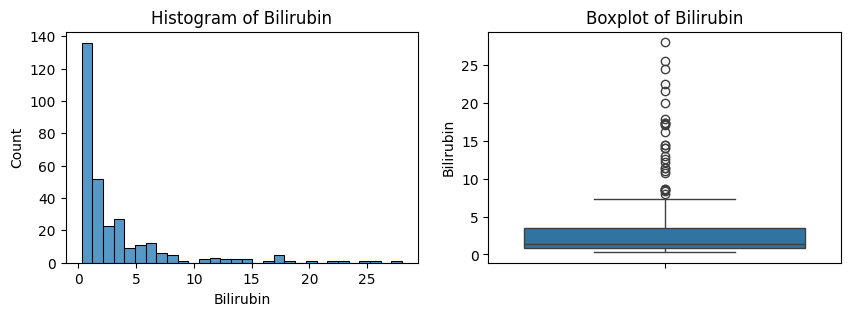

Bilirubin - Skewness: 2.817540214492091
Bilirubin - Kurtosis: 8.680667490516994


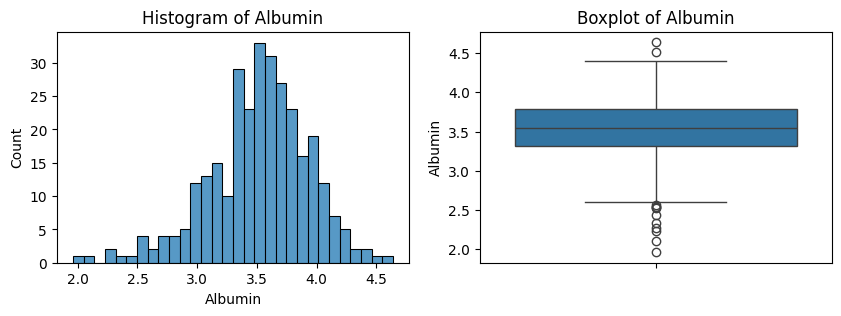

Albumin - Skewness: -0.5782674450898165
Albumin - Kurtosis: 0.9638761384912069


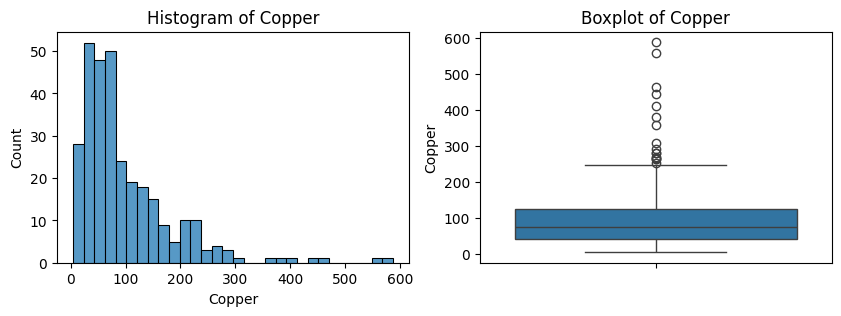

Copper - Skewness: 2.2856431823652814
Copper - Kurtosis: 7.515563507128517


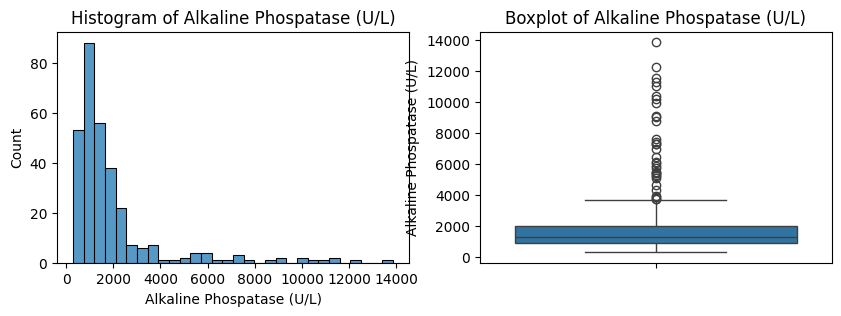

Alkaline Phospatase (U/L) - Skewness: 3.005139813159215
Alkaline Phospatase (U/L) - Kurtosis: 9.723126571888724


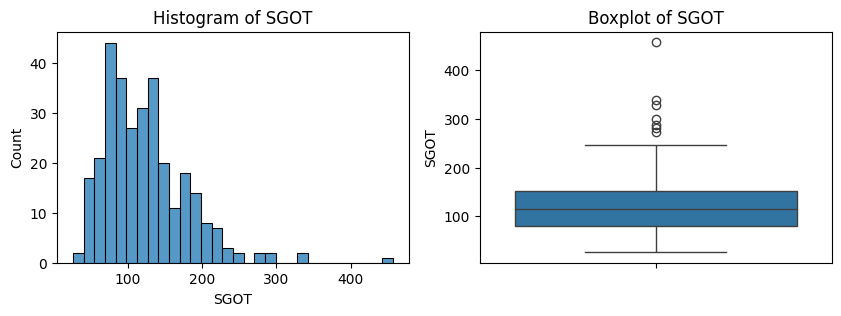

SGOT - Skewness: 1.4474186250483927
SGOT - Kurtosis: 4.289812936450611


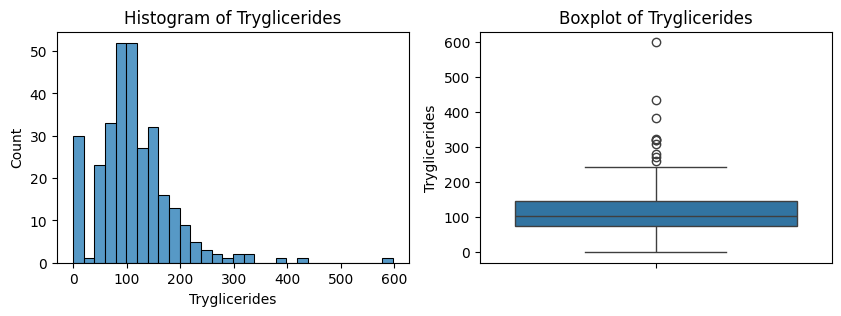

Tryglicerides - Skewness: 1.673768524651463
Tryglicerides - Kurtosis: 7.7356324734000665


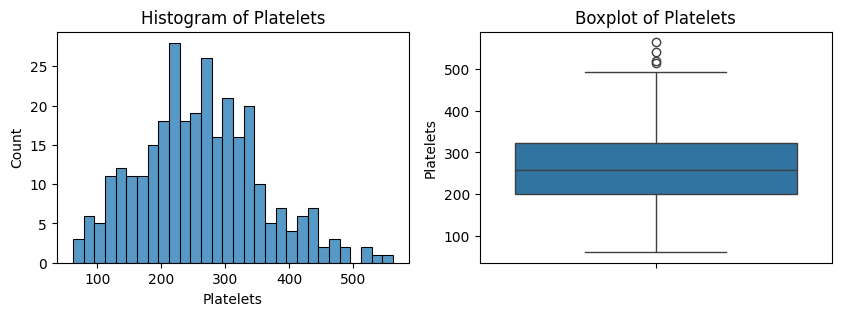

Platelets - Skewness: 0.3734854844035126
Platelets - Kurtosis: -0.005941626677032907


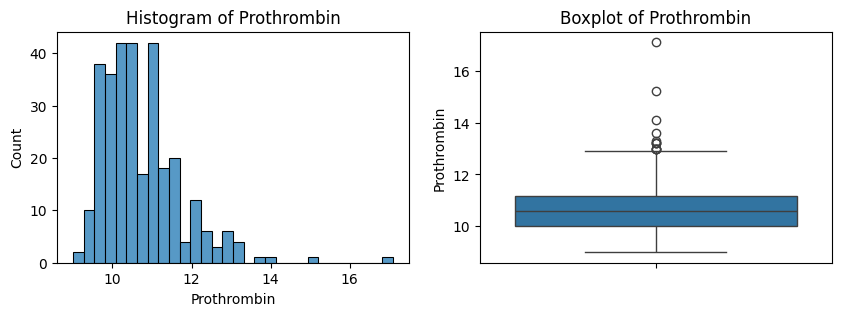

Prothrombin - Skewness: 1.7392944630320002
Prothrombin - Kurtosis: 6.018483343031384


In [43]:
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')

check_distribution_outliers(df[numerical_features], numerical_features)

The distribution of numerical features shows many outliers; however, **they are not preprocessed further as this is a medical dataset where outliers may represent critical or valid variations** in patient data rather than errors, and removing them could **lead to loss of valuable information**.

In [46]:
for i in numerical_features:
    stat, p_value = shapiro(df[i])
    print(f"{i}:\n Shapiro-Wilk Stat = {stat}, p-value = {p_value}\n")

Bilirubin:
 Shapiro-Wilk Stat = 0.6260729010311376, p-value = 2.651784631728777e-25

Albumin:
 Shapiro-Wilk Stat = 0.9797778235186683, p-value = 0.00025741803714511384

Copper:
 Shapiro-Wilk Stat = 0.7900237787922918, p-value = 1.463429754493277e-19

Alkaline Phospatase (U/L):
 Shapiro-Wilk Stat = 0.6123021951338488, p-value = 1.0898395204675184e-25

SGOT:
 Shapiro-Wilk Stat = 0.9120212343291327, p-value = 2.1411575836744633e-12

Tryglicerides:
 Shapiro-Wilk Stat = 0.8889099488770487, p-value = 3.843630049820408e-14

Platelets:
 Shapiro-Wilk Stat = 0.9880042168947346, p-value = 0.012354922069453503

Prothrombin:
 Shapiro-Wilk Stat = 0.8831713614020146, p-value = 1.552008405912485e-14





All features fail the normality test (p-value < 0.05), indicating that the **data does not follow a normal distribution.**
*   Features like **Bilirubin, Copper, and Alkaline Phosphatase** show extreme deviations from normality, as seen from very low W statistics and p-values.



**Check Variables' Correlarion with Y Variable**

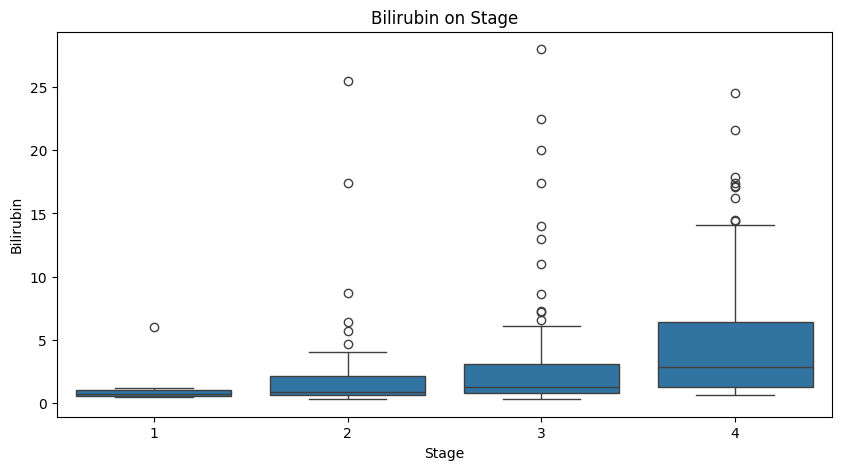

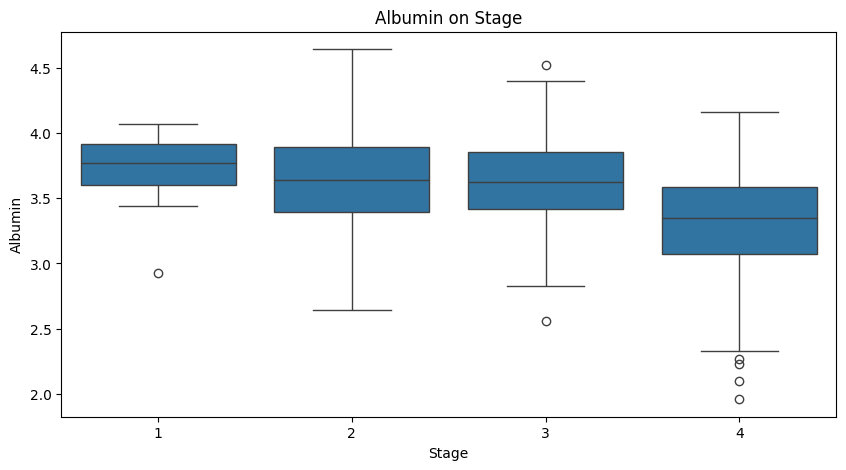

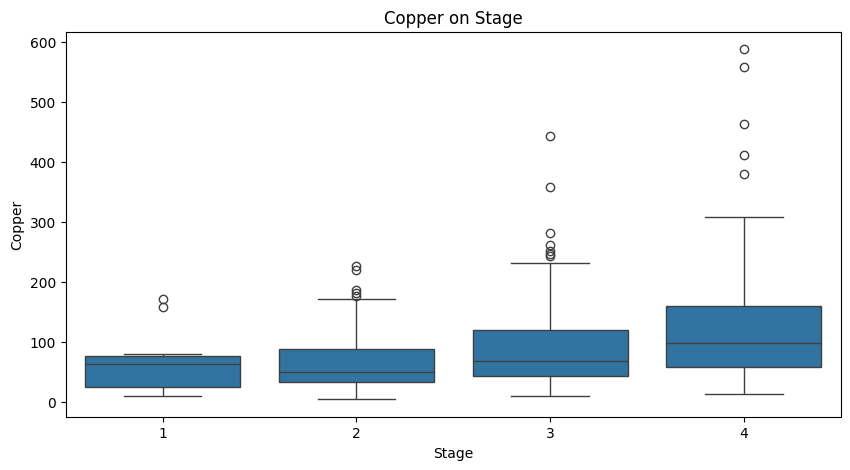

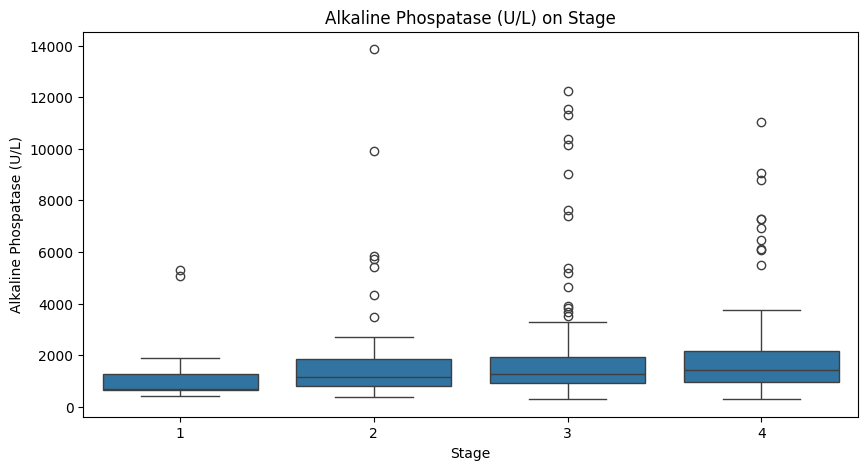

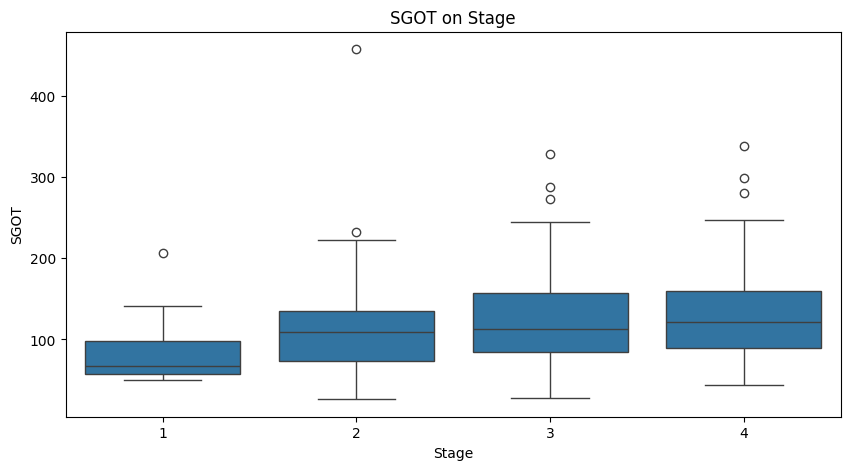

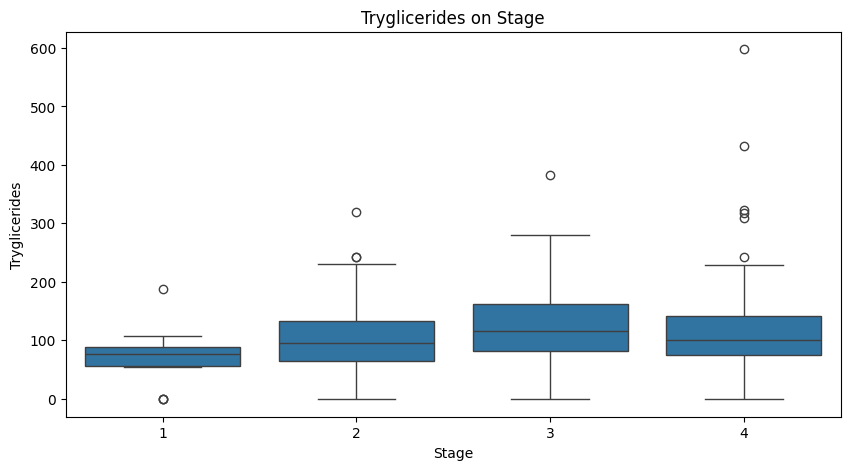

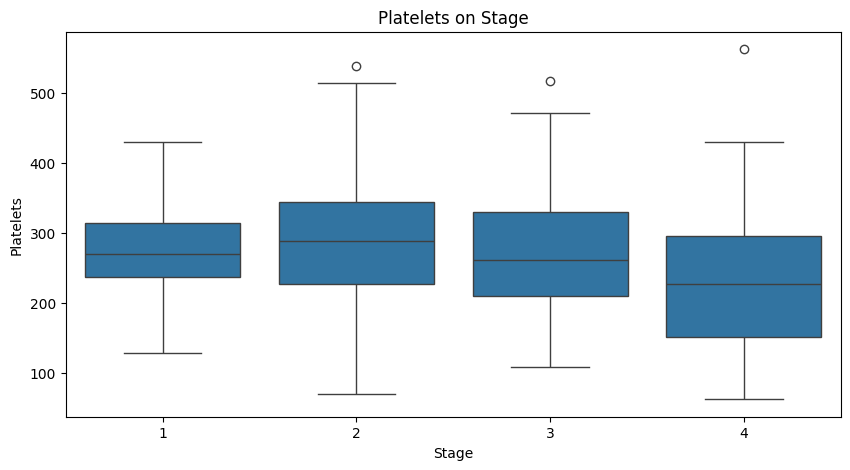

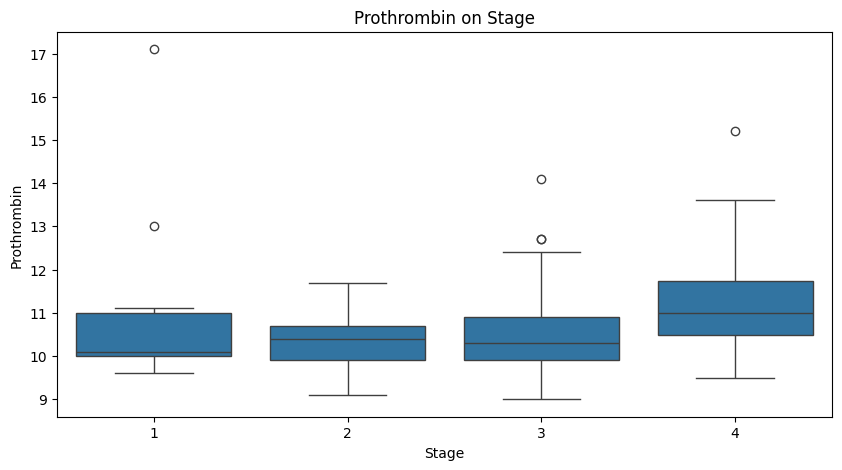

In [44]:
def check_numcols_with_Y(data, cols, target, target_order):
    for col in cols:
        plt.figure(figsize = (10, 5))

        sns.boxplot(x = data[target],
                    y = data[col],
                    order = target_order)
        plt.title(f"{col} on {target}")

        plt.show()

check_numcols_with_Y(df,
                     numerical_features,
                     'Stage',
                     target_order=[1,2,3,4])

The correlation between the numerical features and the target variable (Stage) and found that **all numerical features have a significant impact**. This suggests that each numerical feature **contributes meaningful information to predicting cirrhosis stages**, making them valuable for inclusion in the model.

<Figure size 1000x500 with 0 Axes>

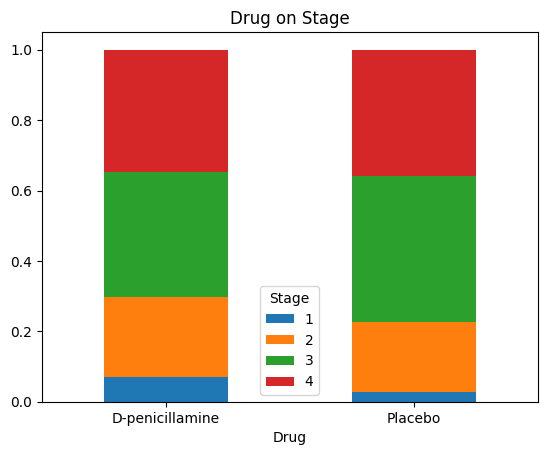

<Figure size 1000x500 with 0 Axes>

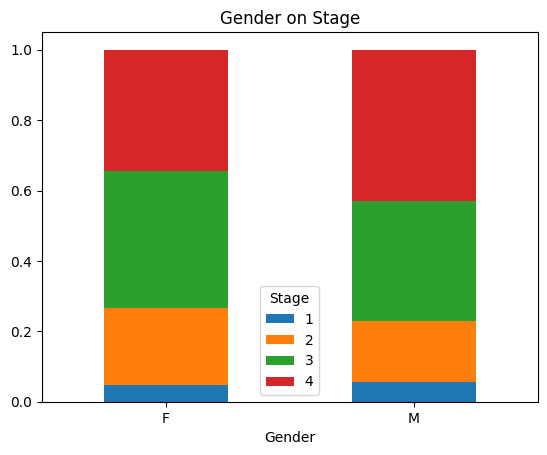

<Figure size 1000x500 with 0 Axes>

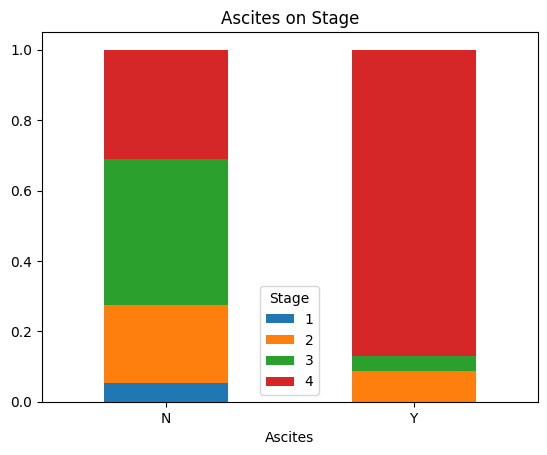

<Figure size 1000x500 with 0 Axes>

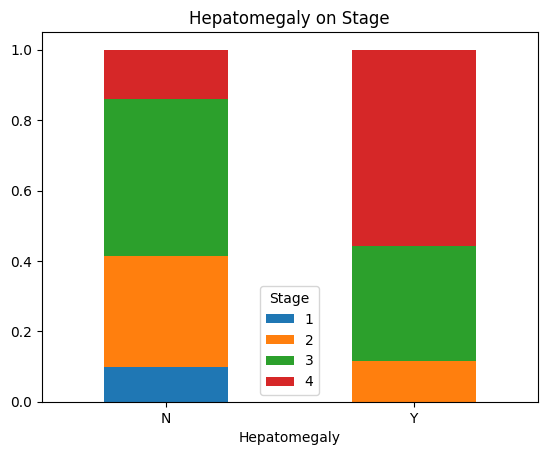

<Figure size 1000x500 with 0 Axes>

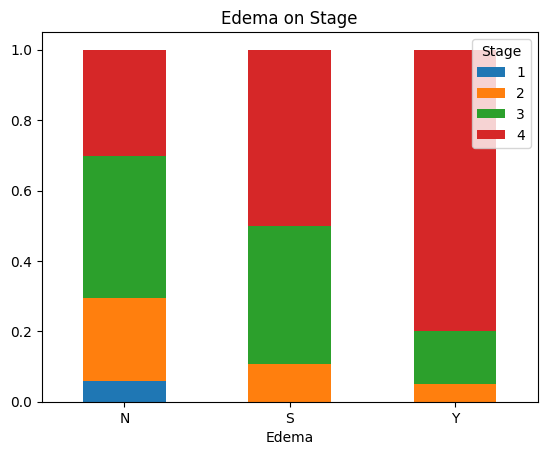

In [45]:
def check_catcols_with_Y(data, cols, target):
    for col in cols:
        plt.figure(figsize = (10, 5))

        data.groupby(col)[target].\
          value_counts(normalize = True).\
          unstack(target).\
          plot.\
          bar(stacked = True)
        plt.title(f"{col} on {target}")
        plt.xticks(rotation = 0)

        plt.show()

checkcatcols = ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema']
check_catcols_with_Y(df, checkcatcols, 'Stage')

**Drug and Gender** show little influence on the target variable **(Stage)**. However, features like **Ascites, Hepatomegaly, and Edema** significantly impact the prediction of cirrhosis stages, indicating their importance in the model.

**Encoding**

In [47]:
label_encoder = LabelEncoder()
label_encode_cols = ['Drug', 'Gender', 'Edema', 'Ascites', 'Hepatomegaly', 'Stage']

for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())
df.head()

   Drug  Gender  Ascites  Hepatomegaly  Edema  Bilirubin  Albumin  Copper  \
0     0       0        1             1      2       14.5     2.60   156.0   
1     0       0        0             1      0        1.1     4.14    54.0   
2     0       1        0             0      1        1.4     3.48   210.0   
3     0       0        0             1      1        1.8     2.54    64.0   
4     1       0        0             1      0        3.4     3.53   143.0   

   Alkaline Phospatase (U/L)    SGOT  Tryglicerides  Platelets  Prothrombin  \
0                     1718.0  137.95          172.0      190.0         12.2   
1                     7394.8  113.52           88.0      221.0         10.6   
2                      516.0   96.10           55.0      151.0         12.0   
3                     6121.8   60.63           92.0      183.0         10.3   
4                      671.0  113.15           72.0      136.0         10.9   

   Stage  
0      3  
1      2  
2      3  
3      3  
4      

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,1,1,2,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,0,0,0,1,0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,0,1,0,0,1,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,0,0,0,1,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
4,1,0,0,1,0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2


**Data Splitting**

In [48]:
X = df.drop(columns=['Stage'])  # Features
y = df['Stage']  # Target variable (Stage)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Scaling**

In [50]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Robust Scaler** is used to scale the numerical features. The Robust Scaler is less sensitive to outliers, as it scales the data based on the median and interquartile range, ensuring the model is not overly influenced by extreme values.

## **Modelling & Evaluation**

**Random Forest**

In [67]:
rf_default = RandomForestClassifier(n_estimators = 10, criterion = 'log_loss')
rf_default.fit(X_train, y_train)


y_pred_default = rf_default.predict(X_test)

print("Before Fine-Tuning")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_default))

Before Fine-Tuning
Random Forest Confusion Matrix:
 [[ 0  1  1  0]
 [ 0  4  7  3]
 [ 0  3 19  5]
 [ 0  3  6 10]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.36      0.29      0.32        14
           2       0.58      0.70      0.63        27
           3       0.56      0.53      0.54        19

    accuracy                           0.53        62
   macro avg       0.37      0.38      0.37        62
weighted avg       0.50      0.53      0.51        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Confusion Matrix Evaluation (before Fine Tuning)**:  
1. Stage 1: The model struggles to classify this stage, with most instances misclassified as Stage 2 or Stage 3.
2. Stage 2: This stage is somewhat better classified but still has significant misclassifications.
3. Stage 3: It is better predicted compared to Stage 1 and Stage 2.
4. Stage 4: The model predicts this stage relatively accurately, with a few misclassifications to Stage 3.

**Random Forest Classification Report Evaluation (before Fine Tuning):**
1. **Precision**:
    * Stage 1: 0.00 (No correct predictions for Stage 1)
    * Stage 2: 0.36 (36% of predicted Stage 2 are correct)
    * Stage 3: 0.58 (58% of predicted Stage 3 are correct)
    * Stage 4: 0.56 (56% of predicted Stage 4 are correct)

2. **Recall**:
    * Stage 1: 0.00 (The model fails to correctly identify Stage 1 instances)
    * Stage 2: 0.29 (Only 29% of actual Stage 2 instances are predicted correctly)
    * Stage 3: 0.70 (70% of actual Stage 3 are predicted correctly)
    * Stage 4: 0.53 (53% of actual Stage 4 are predicted correctly)

3. **F1-Score**:
    * Stage 1: 0.00 (No correct predictions for Stage 1)
    * Stage 2: 0.32 (Poor performance)
    * Stage 3: 0.63 (Moderate performance)
    * Stage 4: 0.54 (Decent performance)

4. Accuracy: The model's overall accuracy is 53%, which shows that the model's performance is quite low.
5. Macro Average: The average across all stages, showing low performance (0.37, 0.38, 0.37).
6. Weighted Average: A slightly better average when weighted by the number of instances in each class (0.50, 0.53, 0.51), but still indicates room for improvement.

**CONCLUSION:**
The model is having difficulty predicting **Stage 1 and Stage 2**, with **Stage 3 and Stage 4** performing better.
Fine-tuning the model, such as adjusting hyperparameters, addressing class imbalance, or exploring different features, could help improve performance, especially for Stage 1.

**XGBoost**

In [60]:
xgboost_default = XGBClassifier(eval_metric="logloss",
                                use_label_encoder=False,
                                random_state=42)

xgboost_default.fit(X_train, y_train)
y_pred_default = xgboost_default.predict(X_test)

print("Before Fine-Tuning")
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_default))

Before Fine-Tuning
XGBoost Confusion Matrix:
 [[ 0  0  2  0]
 [ 2  3  5  4]
 [ 0  3 13 11]
 [ 0  0  2 17]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.21      0.30        14
           2       0.59      0.48      0.53        27
           3       0.53      0.89      0.67        19

    accuracy                           0.53        62
   macro avg       0.41      0.40      0.37        62
weighted avg       0.53      0.53      0.50        62



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**XGBoost Confusion Matrix Evaluation (before Fine Tuning)**:  
1. Stage 1 is predicted poorly, with instances mostly misclassified as Stage 2 or Stage 3.
2. Stage 2 is somewhat better predicted, but still has a significant number of misclassifications.
3. Stage 3 is more accurately predicted, with 89% recall, indicating a high rate of correct identification.
4. Stage 4 is predicted accurately, with a high recall (89%).

**XGBoost Classification Report Evaluation (before Fine Tuning):**
1. **Precision**:
    * Stage 1: 0.50 (Half of the predicted Stage 1 are correct)
    * Stage 2: 0.59 (59% of predicted Stage 2 are correct)
    * Stage 3: 0.53 (53% of predicted Stage 3 are correct)
    * Stage 4: 0.89 (89% of predicted Stage 4 are correct)

2. **Recall**:
    * Stage 1: 0.21 (Only 21% of actual Stage 1 are predicted correctly)
    * Stage 2: 0.48 (48% of actual Stage 2 are predicted correctly)
    * Stage 3: 0.89 (89% of actual Stage 3 are predicted correctly)
    * Stage 4: 0.89 (89% of actual Stage 4 are predicted correctly)

3. **F1-Score**:
    * Stage 1: 0.30 (Low performance)
    * Stage 2: 0.53 (Moderate performance)
    * Stage 3: 0.67 (Better performance)
    * Stage 4: 0.67 (Good performance)

4. Accuracy: The model's overall accuracy is 53%, indicating that the model is not performing very well overall.
5. Macro Average: The unweighted average of precision, recall, and F1-score (0.41, 0.40, 0.37), indicating the model is not performing well across all stages.
6. Weighted Average: The weighted average of precision, recall, and F1-score (0.53, 0.53, 0.50), which is slightly better but still suggests room for improvement.

**CONCLUSION:**
The model performs well on **Stage 3 and Stage 4**, but has significant difficulties with **Stage 1 and Stage 2**.
Fine-tuning of hyperparameters, improving class balance, or exploring different features could potentially enhance the model's performance, particularly for Stage 1 and Stage 2.

## **Fine Tuning**

**Random Forest**

In [62]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 8],
    'criterion': ['entropy', 'gini', 'log_loss']
}

rf_grid_search = GridSearchCV(estimator=rf,
                              param_grid=rf_param_grid,
                              cv=stratified_kfold,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
print(f"Best Random Forest Hyperparameters: {rf_grid_search.best_params_}")

y_pred_tuned = best_rf.predict(X_test)

# Evaluate the model (after fine-tuning)
print("\nAfter Fine-Tuning")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

After Fine-Tuning
Random Forest Confusion Matrix:
 [[ 0  1  1  0]
 [ 0  4  5  5]
 [ 0  3 14 10]
 [ 0  0  3 16]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.29      0.36        14
           2       0.61      0.52      0.56        27
           3       0.52      0.84      0.64        19

    accuracy                           0.55        62
   macro avg       0.41      0.41      0.39        62
weighted avg       0.54      0.55      0.52        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Best Hyperparameters:**
1. Criterion: 'entropy'
2. Max Depth: 10
3. Min Samples Split: 2
4. Number of Estimators: 50

**Random Forest Confusion Matrix Evaluation (after Fine Tuning)**:  
1. Stage 1: Still poorly predicted, with most instances misclassified as Stage 2 or Stage 3.
2. Stage 2: Improved predictions compared to before, but misclassifications to Stage 3 remain.
3. Stage 3: Stronger prediction, with 84% recall, indicating a significant improvement in identifying this stage.
4. Stage 4: Predicted accurately, with 84% recall.

**Random Forest Classification Report Evaluation (after Fine Tuning):**
1. **Precision**:
    * Stage 1: 0.50 (Precision improves slightly compared to before)
    * Stage 2: 0.61 (Better precision than before)
    * Stage 3: 0.52 (Slight improvement)
    * Stage 4: 0.84 (Good precision)

2. **Recall**:
    * Stage 1: 0.29 (Recall remains low)
    * Stage 2: 0.52 (Moderate improvement)
    * Stage 3: 0.84 (Strong improvement in recall)
    * Stage 4: 0.84 (Strong improvement in recall)

3. **F1-Score**:
    * Stage 1: 0.36 (Improvement, but still low)
    * Stage 2: 0.56 (Better than before)
    * Stage 3: 0.64 (Significant improvement)
    * Stage 4: 0.64 (Good performance)

4. Accuracy: The model's overall accuracy has improved to 55% (up from 53%).
5. Macro Average: The unweighted average of precision, recall, and F1-score (0.41, 0.41, 0.39), showing small improvements, but still relatively low.
6. Weighted Average: The weighted average of precision, recall, and F1-score (0.54, 0.55, 0.52), indicating an improvement in overall performance, but there’s still room for further optimization.

**CONCLUSION:**
Fine-tuning the Random Forest model has led to some improvement, **particularly for Stage 3 and Stage 4, which show better recall and F1-scores.**
**Stage 1** still has low recall and precision, suggesting that further efforts, such as adjusting the class imbalance or incorporating additional features, may be necessary.
The model's overall accuracy and performance are better than before, but there's still potential for further improvement, especially for Stage 1.

**XGBoost**

In [68]:
xgboost_model = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgboost_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\nBest XGBoost Parameters:", grid_search.best_params_)

# Predict on the test set using the fine-tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the fine-tuned model
print("\nAfter Fine-Tuning")
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:19:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best XGBoost Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

After Fine-Tuning
XGBoost Confusion Matrix:
 [[ 0  0  2  0]
 [ 0  2 10  2]
 [ 0  0 16 11]
 [ 0  0  2 17]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.14      0.25        14
           2       0.53      0.59      0.56        27
           3       0.57      0.89      0.69        19

    accuracy                           0.56        62
   macro avg       0.52      0.41      0.38        62
weighted avg       0.63      0.56      0.51        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Best Hyperparameters**:
1. Colsample_bytree: 0.6
2. Learning Rate: 0.01
3. Max Depth: 3
4. Number of Estimators: 50
5. Subsample: 0.8

**XGBoost Confusion Matrix Evaluation (after Fine Tuning)**:  
1. Stage 1: The model's predictions are still poor, with Stage 1 instances often misclassified as Stage 3.
2. Stage 2: While misclassifications to Stage 3 persist, there's some improvement in predictions for Stage 2.
3. Stage 3: Strong performance with a high recall of 89%, indicating that Stage 3 is identified accurately.
4. Stage 4: Very accurate prediction for Stage 4, with a high recall of 89%.

**XGBoost Classification Report Evaluation (after Fine Tuning):**
1. **Precision**:
    * Stage 1: 1.00 (High precision for predicted Stage 1, but only a small number of true Stage 1 predictions)
    * Stage 2: 0.53 (Better precision for Stage 2 compared to before)
    * Stage 3: 0.57 (Slight improvement in precision)
    * Stage 4: 0.69 (Good precision for Stage 4)

2. **Recall**:
    * Stage 1: 0.14 (Recall remains low for Stage 1, meaning it’s still poorly identified)
    * Stage 2: 0.59 (Moderate recall for Stage 2)
    * Stage 3: 0.89 (Strong recall for Stage 3, indicating good identification)
    * Stage 4: 0.89 (Strong recall for Stage 4)

3. **F1-Score**:
    * Stage 1: 0.25 (F1-score remains low, indicating poor performance)
    * Stage 2: 0.56 (Improved F1-score for Stage 2)
    * Stage 3: 0.69 (Good F1-score for Stage 3)
    * Stage 4: 0.69 (Good F1-score for Stage 4)

4. Accuracy: The overall accuracy has improved to 56%, which shows some progress.
5. Macro Average: The unweighted average of precision, recall, and F1-score (0.52, 0.41, 0.38), indicating that the model is performing better than before, but still has room for improvement.
6. Weighted Average: The weighted average of precision, recall, and F1-score (0.63, 0.56, 0.51), showing a better overall performance compared to before, especially in Stage 3 and Stage 4.

**CONCLUSION:**
The XGBoost model shows improvement, particularly in **Stage 3 and Stage 4 with good recall and F1-scores.**
**Stage 1** still suffers from poor performance, with low recall and F1-score, which suggests more work is needed to improve its classification.
The model's overall accuracy and performance have improved, but fine-tuning further or exploring other techniques (like feature engineering or balancing the dataset) could help improve predictions for Stage 1 and Stage 2.

## **Choosing Best Model - With 3 Evaluation Metrics**

### **Accuracy**

* Random Forest (After Fine-Tuning): Accuracy = 55%
* XGBoost (After Fine-Tuning): Accuracy = 56%  

Both models show a similar accuracy, with XGBoost **slightly outperforming** Random Forest. This indicates that, in general, **the models are correctly classifying about half of the data**. However, accuracy alone does not give a full picture, especially when the dataset is imbalanced or when there are classes that are harder to predict.

### **F1-Score**

* Random Forest (After Fine-Tuning):
    * Stage 1: F1 = 0.36
    * Stage 2: F1 = 0.56
    * Stage 3: F1 = 0.64
    * Stage 4: F1 = 0.64
* XGBoost (After Fine-Tuning):
    * Stage 1: F1 = 0.25
    * Stage 2: F1 = 0.56
    * Stage 3: F1 = 0.69
    * Stage 4: F1 = 0.69

XGBoost shows a higher F1-Score for **Stage 3 (0.69) and Stage 4 (0.69)** compared to Random Forest (0.64 for both stages). This suggests that **XGBoost has a better balance between precision and recall**, particularly for these stages.
Stage 1 has a low F1-score for both models, with XGBoost performing worse (0.25) than Random Forest (0.36).

### **Confusion Matrix**

1. Random Forest (After Fine-Tuning):
    * Stage 3 and Stage 4 are mostly correctly classified (low misclassification).
    * Stage 1 and Stage 2 have more misclassifications, especially Stage 1, where predictions are confused with Stage 3.

2. XGBoost (After Fine-Tuning):
    * Similar to Random Forest, **XGBoost also misclassifies Stage 1 and Stage 2.** However, XGBoost performs better in correctly predicting Stage 3 and Stage 4 (fewer misclassifications for these stages).


### **CONCLUSION**

1. **Best Model**: **XGBoost** is the better model overall due to its higher F1-Score for Stage 3 and Stage 4, which are the most critical stages in this medical dataset.
2. Accuracy: Both models have similar accuracy, but the additional metrics (F1-Score and Confusion Matrix) indicate that XGBoost is more balanced in predicting the stages effectively.
3. Confusion Matrix: XGBoost shows better performance in terms of minimizing misclassifications for Stage 3 and Stage 4, although it struggles with Stage 1 predictions just like Random Forest.

## **Important Features**


The features **albumin, bilirubin, platelets, and ascites** are crucial for predicting cirrhosis stages because they directly reflect liver function and disease progression:

1. Albumin: Low levels indicate liver dysfunction, common in advanced stages (Stage 3 and Stage 4).
2. Bilirubin: High levels signify liver damage, especially in Stage 3 and Stage 4.
3. Platelets: Decreased count is linked to severe cirrhosis, seen in later stages (Stage 3 and Stage 4).
4. Ascites: Fluid buildup in the abdomen occurs in advanced stages, indicating severe liver damage.

Thus, these variables are key in distinguishing between different stages of cirrhosis.